<a href="https://colab.research.google.com/github/yarrib/fastai-projects-v2/blob/master/Fit_Simple_Fish_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install fastbook fastai --upgrade



from fastai.vision.widgets import *
from fastbook import *
import os
!ls


from google.colab import auth
auth.authenticate_user()




In [ ]:
import os
os.getcwd()

'/content'

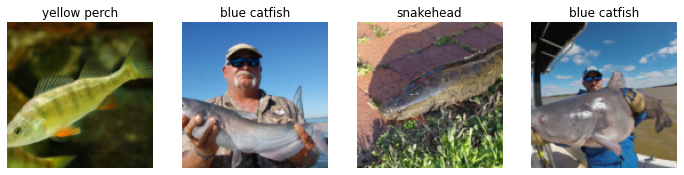

In [ ]:
# get data by the path
path = Path('/content/drive/MyDrive/Colab Notebooks/fish')



fish = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


dls = fish.dataloaders(path)

dls.valid.show_batch(max_n=4,nrows=1)

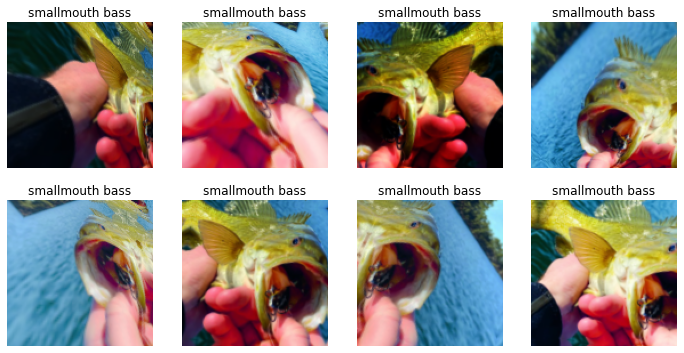

In [ ]:
# example of random aumentation
f2 = fish.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = f2.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
fish = fish.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                batch_tfms=aug_transforms())
dls = fish.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

NameError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
interp.plot_top_losses(10,nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# to delete
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [ ]:
# to move
for idx,cat in clenaer.change():
  shutil.move(str(cleaner.fns[idx]),path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict(# some image)

Now 